In [21]:
import warnings
warnings.filterwarnings(action = 'ignore')

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
pd.reset_option('^display.', silent = True)

import random
import math
import gc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

from wordcloud import WordCloud

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\wogys\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
pip install --upgrade scikit-learn

In [5]:
# Set random seed
np.random.seed(311)
random.seed(311)

In [6]:
true_df = pd.read_csv("C:/Users/wogys/Desktop/fake real/input/fake-and-real-news-dataset/True.csv")
false_df = pd.read_csv("C:/Users/wogys/Desktop/fake real/input/fake-and-real-news-dataset/Fake.csv")

In [7]:
true_df['class'] = 1
false_df['class'] = 0

fake_news_df = pd.concat([true_df, false_df])

In [8]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [9]:
display(fake_news_df.head(3))

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [10]:
# convert text columns to lower case
fake_news_df['title'] = fake_news_df['title'].str.lower()
fake_news_df['text'] = fake_news_df['text'].str.lower()

# remove punctuation
fake_news_df['title'] = fake_news_df['title'].str.replace('[^\w\s]', '')
fake_news_df['text'] = fake_news_df['text'].str.replace('[^\w\s]', '')

fake_news_df['text'].head()

0    washington reuters  the head of a conservative...
1    washington reuters  transgender people will be...
2    washington reuters  the special counsel invest...
3    washington reuters  trump campaign adviser geo...
4    seattlewashington reuters  president donald tr...
Name: text, dtype: object

In [11]:
fake_news_df['text_combined'] = fake_news_df['title'] + fake_news_df['text']

In [12]:
fake_news_df = fake_news_df[fake_news_df['title'].str.contains('trump')]
fake_news_df.shape

(14452, 6)

0    8910
1    5542
Name: class, dtype: int64


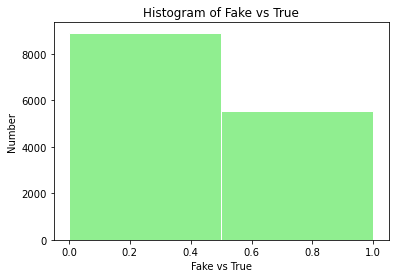

In [13]:
print(fake_news_df['class'].value_counts())

plt.hist(fake_news_df['class'], color ='lightgreen', edgecolor = 'white', bins = 2)
plt.xlabel('Fake vs True')
plt.ylabel('Number')
plt.title('Histogram of Fake vs True')
plt.show()

In [14]:
real = fake_news_df[fake_news_df['class'] == 1]
fake = fake_news_df[fake_news_df['class'] == 0]

fake_downsample = resample(fake,
             replace = True,
             n_samples = len(real),
             random_state = 311)

print(fake_downsample.shape)

fake_news_df = pd.concat([real, fake_downsample])

(5542, 6)


In [15]:
fake_rest_df = fake[~fake.index.isin(fake_downsample.index)]
fake_rest_df.shape

(4829, 6)

In [16]:
def split_data(data, labels, valid_part_size = 0.15, test_part_size = 0.15):

    # Split the dataset into train, validation, and test
    X_train, X_test, y_train, y_test = train_test_split(
        data, 
        labels, 
        test_size = test_part_size, 
        stratify = labels, 
        random_state = 311
        )
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, 
        y_train, 
        test_size = valid_part_size/(1 - test_part_size), 
        stratify = y_train, 
        random_state = 311
        )

    return (X_train, y_train), (X_valid, y_valid), (X_test, y_test)

In [17]:
(X_train, y_train), (X_valid, y_valid), (X_test,y_test) = split_data(
    fake_news_df['text_combined'], 
    fake_news_df['class'], 
    0.15, 
    0.15
)

In [18]:
X_valid.head(1)

18467    trumps lawyer destroys chriswallace in heated ...
Name: text_combined, dtype: object

In [19]:
# Retrieve combined text from the train data
text_data = X_train.tolist()
print(text_data[ : 1])

[' watch deplorable trump supporter punches protester and slaps woman at rallytrump supporters have proven hillary clinton right once againduring a rally in ashville north carolina on monday a trump fan was filmed physically assaulting some protesters with the republican nominee s full support as he gave the thumbs upat the top of some bleachers a middleaged white guy can be seen grabbing and punching a male protester security intervened but rather than remove the trump supporter for committing an actual crime they kicked out the protesters insteadthe man verbally harasses the group as they file out down the steps all while acting like he is some kind of tough guy and then goes as far as slapping a female protester on her way outhere s the video via twitterwatch man slaps several protesters as they are being escorted out of realdonaldtrump rally in asheville nc pictwittercomkmkcdviar4  abc news politics abcpolitics september 12 2016again this asshole did not get removed from the rally 